In [2]:
import sys
import os
import argparse

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

#tesnorflow
import tensorflow as tf
from tensorflow import keras
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model

import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers

from tensorflow.keras.layers  import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D, DepthwiseConv2D


# Deep Learning - Keras - Pretrained Models
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3

# Deep Learning - Keras - Model Parameters and Evaluation Metrics

from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Deep Learning - Keras - Visualisation

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from keras import backend as K

# Deep Learning - TensorFlow

import tensorflow as tf

# Graph/ Visualization

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image

import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline


In [3]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/Internship_2023/fruit_detection.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
y_test_1=[]
test_path_1='/content/drive/MyDrive/Internship_2023/FINAL TEST'

for i in os.listdir(test_path_1):
  #print(i)
  if "X" in i:
    y_test_1.append(0)

#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "Y" in i:
    y_test_1.append(1)
#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "Z" in i:
    y_test_1.append(2)
#print(y_test)

#print(y_test_1)
print(len(y_test_1))
print(y_test_1)
###############################

90
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
#samreen editt
start = datetime.datetime.now()
print(start)
y_pred_1=[]
# ds_eye_dir = "C:/DUAEFATIMA/eyePACS/eyepacs_augmented"
#Generating a dataset
# ds_eye = tf.keras.preprocessing.image_dataset_from_directory(ds_eye_dir)
test_path_1='/content/drive/MyDrive/Internship_2023/FINAL TEST'
for i in os.listdir(test_path_1):
  print(i)
  img=image.load_img(test_path_1+'//'+i,target_size=(256,256))
  #img = tf.keras.utils.load_img(image_path, target_size=(224,224))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,256,256,3)
  label = model.predict(img)
  # print("Predicted score",label)
   #print("Predicted Clas, ls (0 - Cars , 1- Planes): ", label[1][1])
  p=np.argmax(label)
  print("Predicted ",[p])
  #print([p])
  y_pred_1.append(p)
print(len(y_pred_1))

end = datetime.datetime.now()
print(end)
elapsed= end-start
print ("Time: ", elapsed)



2023-04-13 07:16:26.387672
Z_mango (26).jpg
1/1 [==============================] - 0s 479ms/step
Predicted  [2]
Z_mango (30).jpg
1/1 [==============================] - 0s 154ms/step
Predicted  [2]
Z_mango (25).jpg
1/1 [==============================] - 0s 113ms/step
Predicted  [2]
Z_mango (28).jpg
1/1 [==============================] - 0s 86ms/step
Predicted  [2]
Z_mango (27).jpg
1/1 [==============================] - 0s 70ms/step
Predicted  [2]
X_aloevera (34).jpg
1/1 [==============================] - 0s 69ms/step
Predicted  [0]
X_aloevera (10).jpg
1/1 [==============================] - 0s 76ms/step
Predicted  [0]
X_aloevera (30).jpg
1/1 [==============================] - 0s 68ms/step
Predicted  [0]
X_aloevera (2).jpg
1/1 [==============================] - 0s 67ms/step
Predicted  [0]
X_aloevera (16).jpg
1/1 [==============================] - 0s 84ms/step
Predicted  [0]
X_aloevera (26).jpg
1/1 [==============================] - 0s 68ms/step
Predicted  [0]
X_aloevera (13).jpg
1/1 [====

In [11]:
print(y_pred_1)

[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]


90
90


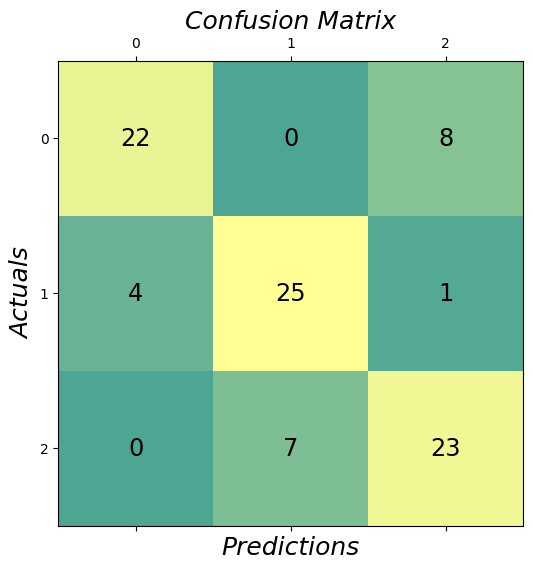

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

# Calculate the confusion matrix_1
# print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)

#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 8))
ax.matshow(conf_matrix, cmap=plt.cm.summer, alpha=0.7)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18,fontstyle="italic")
plt.ylabel('Actuals', fontsize=18,fontstyle="italic")
plt.title('Confusion Matrix', fontsize=18,fontstyle="italic")
plt.show()


# print('Precision: %.3f' % precision_score(y_test_1, y_pred_1,average='micro'))
# print('Recall: %.3f' % recall_score(y_test_1, y_pred_1,average='micro'))
# print('Accuracy: %.3f' % accuracy_score(y_test_1, y_pred_1))
# print('F1 Score: %.3f' % f1_score(y_test_1, y_pred_1,average='micro'))



In [13]:
accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 77.8% 


In [14]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)

Sensitivity [0.73333333 0.83333333 0.76666667]
Specificity [0.93333333 0.88333333 0.85      ]
Precision or Positive Predictive Values [0.84615385 0.78125    0.71875   ]
Negative predictive values [0.875      0.9137931  0.87931034]
False Positive or Fall Out [0.06666667 0.11666667 0.15      ]
False Negative Rate [0.26666667 0.16666667 0.23333333]
False discovery Rate [0.15384615 0.21875    0.28125   ]
Accuracy [0.86666667 0.86666667 0.82222222]


ROC AUC score: 0.8333333333333334


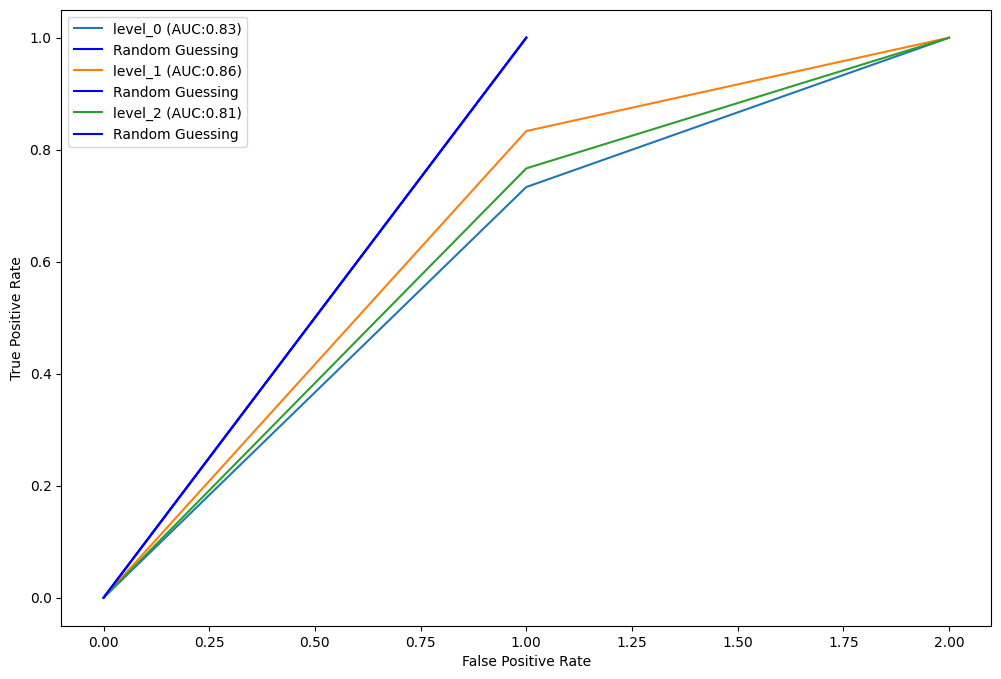

In [16]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

#data = "/content/drive/MyDrive/eyepacs_aug_test_data/data"
target= ['level_0', 'level_1', 'level_2']

# set plot figure siz
fig,  conf_matrix = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        FPR, TPR, thresholds =roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        conf_matrix.plot(TPR, label = '%s (AUC:%0.2f)'  % (c_label, auc(FPR, TPR)))
        conf_matrix.plot(FPR, FPR, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test_1, y_pred_1))

conf_matrix.legend()
conf_matrix.set_xlabel('False Positive Rate')
conf_matrix.set_ylabel('True Positive Rate')
plt.show()